In [1]:
# Baseline MLP for MNIST dataset
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn import metrics
#np_utils

In [2]:
tf.__version__

'2.5.0'

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

In [8]:
y_train[0]

5

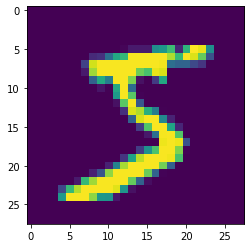

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(X_train[0])

In [9]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels))
#.astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels))
#.astype('float32')

In [13]:
X_test.shape

(10000, 784)

In [14]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [15]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

In [16]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [17]:
num_classes

10

In [18]:
img = X_test[0].reshape(28,28)

In [ ]:
y_test[0]

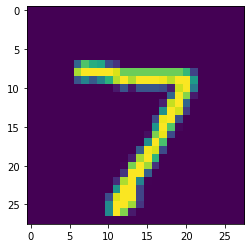

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(img)

In [20]:
# define baseline model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
	model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [21]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model

Epoch 1/10
300/300 - 7s - loss: 0.2755 - accuracy: 0.9210 - val_loss: 0.1327 - val_accuracy: 0.9602
Epoch 2/10
300/300 - 6s - loss: 0.1091 - accuracy: 0.9687 - val_loss: 0.0955 - val_accuracy: 0.9689
Epoch 3/10
300/300 - 5s - loss: 0.0710 - accuracy: 0.9793 - val_loss: 0.0846 - val_accuracy: 0.9732
Epoch 4/10
300/300 - 6s - loss: 0.0491 - accuracy: 0.9859 - val_loss: 0.0670 - val_accuracy: 0.9795
Epoch 5/10
300/300 - 6s - loss: 0.0352 - accuracy: 0.9903 - val_loss: 0.0616 - val_accuracy: 0.9808
Epoch 6/10
300/300 - 5s - loss: 0.0270 - accuracy: 0.9930 - val_loss: 0.0631 - val_accuracy: 0.9808
Epoch 7/10
300/300 - 6s - loss: 0.0189 - accuracy: 0.9954 - val_loss: 0.0599 - val_accuracy: 0.9810
Epoch 8/10
300/300 - 6s - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0652 - val_accuracy: 0.9802
Epoch 9/10
300/300 - 6s - loss: 0.0102 - accuracy: 0.9980 - val_loss: 0.0612 - val_accuracy: 0.9820
Epoch 10/10
300/300 - 6s - loss: 0.0082 - accuracy: 0.9984 - val_loss: 0.0627 - val_accuracy: 0.9820

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 784)               615440    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


model.summary()

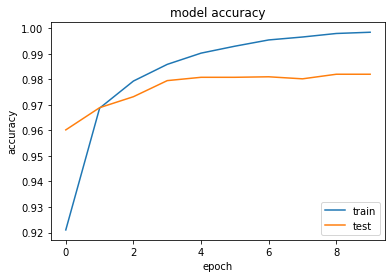

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'lower right')
plt.show()

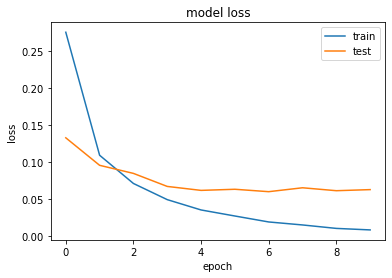

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper right')
plt.show()

In [ ]:
scores, accuracy = model.evaluate(X_test, y_test, verbose=0)
#print("Baseline Error: %.2f%%" % (100-scores[1]*100))
print("Baseline Accuracy: %.2f%%" % (accuracy*100))

In [24]:
y_predict = model.predict(X_test)

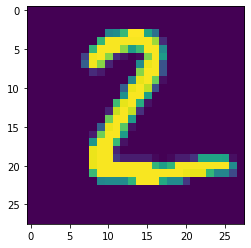

In [25]:
img = X_test[1].reshape(28,28)
%matplotlib inline
import matplotlib.pyplot as plt
imgplot = plt.imshow(img)

In [26]:

y_test = np.argmax(y_test,axis=1)
y_predict = np.argmax(y_predict,axis=1)

In [ ]:
y_predict

In [27]:
confusion_mat = metrics.confusion_matrix(y_test,y_predict)

In [28]:
confusion_mat

array([[ 971,    0,    1,    0,    0,    2,    2,    1,    1,    2],
       [   1, 1125,    3,    1,    0,    1,    2,    0,    2,    0],
       [   0,    1, 1018,    2,    0,    0,    2,    3,    6,    0],
       [   0,    0,    4,  991,    0,    4,    0,    4,    2,    5],
       [   0,    1,    5,    1,  957,    0,    1,    1,    0,   16],
       [   2,    0,    0,    5,    1,  876,    2,    0,    4,    2],
       [   4,    2,    2,    1,    2,    5,  940,    0,    2,    0],
       [   0,    2,    8,    0,    1,    0,    0, 1007,    2,    8],
       [   4,    0,    8,    5,    3,    2,    1,    3,  941,    7],
       [   3,    2,    0,    3,    4,    3,    0,    0,    0,  994]],
      dtype=int64)

In [29]:
result = metrics.classification_report(y_test,y_predict)
print()
print("Classification Results")
print(result)


Classification Results
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.97      0.97       974
           9       0.96      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

